In [6]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import re
import time


In [7]:
'''
This project is a project that is intended to predict fantasy basketball points based on certain indicators that we hope to
discover throughout the data analysis portion of the project.

Because many fantasy basketball datasets have a paywall, in our data, we will take data from all players
in the NBA based on stats, calculate the fantasy points every night for these 200 players, and then we will go from there.

We will use 2021-2022 as the training data and use 2022-2023 as the test set to make predictions for the future. 
'''

# First, we will use the dataset of seasonal averages to get all the general player data

# Data is from basketball reference (https://www.basketball-reference.com/leagues/NBA_2022_per_game.html)

player_data = pd.read_csv("player_data.csv")

player_data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,adamsst01
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,adebaba01
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,aldamsa01
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,aldrila01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,youngth01
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,youngtr01
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,yurtsom01
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,zelleco01


In [18]:
'''
Now we want to scrape the data

In order to scrape data easily, we will loop through the links of each player, we want player data from each game they played
'''

# Import packages
from bs4 import BeautifulSoup
import requests

# Initialize link and dataframe
link = "https://www.basketball-reference.com/players/"
columns = ["Name", "G", "Date", "Age", "Tm", "A/H", "Opp", "Res", "GS", "MP", "FG", 
           "FGA", "FG%", "3P", "3PA", "3P%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", 
           "GmSc", "+/-"]
df = pd.DataFrame(columns = columns)

In [19]:
# Loop through every player's data page
visited = set()
length = len(player_data["Player"].unique())

In [ ]:
for i, line in player_data.iterrows():

    print(line["Player"])
    if line["Player"] not in visited:
        player_id = line["Player-additional"]
        # Get the link for the player's individual stats for 2021-2022 season
        player_link = link + player_id[0] + "/" + player_id + "/gamelog/2022"

        # Use BeautifulSoup to get important contents
        result = requests.get(player_link)
        rc = result.content
        soup = BeautifulSoup(rc, "lxml")

        row = soup.find_all("tr", {"id": re.compile("pgl_basic\.[0-9]+")})
        print(len(row))
        if len(row) > 0:
            visited.add(line["Player"])
            
            for day in row:
                data_html = day.find_all("td")
                data = ["".join(item.strings) for item in data_html]
                data.insert(0, line["Player"])

                df.loc[len(df)] = data

        time.sleep(5)

print(len(df["Name"].unique()))
    

df.to_csv("individual_data.csv")
df

In [62]:
# Now, we don't need to scrape the data. We can read it in.

df = pd.read_csv("individual_data.csv")

df

In [63]:
'''
In our dataset, Here's what all the columns represent:

Name - Name of player
G - game #
Date - date of game
Age - Age in years and days, separated by a hyphen
Tm - Team the player represents
A/H - Away or home game
Opp - Opposing team
Res - Result and margin of game
GS - Whether player started or nah
MP - Minutes played
FG - Field Goals
FGA - Field Goals Attempted
FG% - Field Goal Percent
3P - 3 Pointers Made
3PA - 3 Point Attempts
3P% - 3 Point Percent
FT - Free Throws Made
FTA - Free Throws Attempted
FT% - Free Throw Percent
ORB - Offensive Rebounds
DRB - Defensive Rebounds
TRB - Total Rebounds
AST - Assists
STL - Steals
BLK - Blocks
TOV - Turnovers
PF - Personal Fouls
PTS - Points
GmSc - Game Score
+/- - Plus/Minus 

'''

# First, Let's clean the data

df[["G", "GS", "FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]] =( 
    df1[["G", "GS", "FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]].astype(int))

#df1[["FG%", "3P%", "FT%", "GmSc"]] = df1[["FG%", "3P%", "FT%", "GmSc"]].astype(float)
df["Date"] = pd.to_datetime(df["Date"])

def replace(char):
    if char == "@":
        return "A"
    else:
        return "H"
    
df["A/H"] = df["A/H"].apply(lambda x: replace(x))

df

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,0,Precious Achiuwa,1,2021-10-20,22-031,TOR,H,WAS,L (-15),1,...,4,7,2,1,0,1,4,6,3.9,-6.0
1,1,Precious Achiuwa,2,2021-10-22,22-033,TOR,A,BOS,W (+32),1,...,12,15,0,1,0,0,0,15,15.0,16.0
2,2,Precious Achiuwa,3,2021-10-23,22-034,TOR,H,DAL,L (-8),1,...,9,12,3,0,0,1,3,10,9.6,3.0
3,3,Precious Achiuwa,4,2021-10-25,22-036,TOR,H,CHI,L (-3),1,...,9,11,2,0,0,2,2,11,6.1,-7.0
4,4,Precious Achiuwa,5,2021-10-27,22-038,TOR,H,IND,W (+18),1,...,4,6,0,1,1,0,2,10,8.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26007,26007,Ivica Zubac,72,2022-04-01,25-014,LAC,A,MIL,W (+34),1,...,1,3,4,0,1,0,1,11,11.7,22.0
26008,26008,Ivica Zubac,73,2022-04-03,25-016,LAC,H,NOP,W (+19),1,...,7,14,1,0,1,1,3,16,18.3,3.0
26009,26009,Ivica Zubac,74,2022-04-06,25-019,LAC,H,PHO,W (+4),1,...,10,11,1,0,2,2,4,13,12.6,14.0
26010,26010,Ivica Zubac,75,2022-04-09,25-022,LAC,H,SAC,W (+19),1,...,8,12,2,0,0,0,4,15,14.7,9.0


In [64]:
# Now, let's create a new column describing fantasy points
# Formula: 
# Fantasy Points = Points - 2 * Turnovers + Blocks * 4 + Steals * 4 + Assists * 2 + Rebounds + Three Pointers Made - 
# Free Throws Attempted + Free Throws Made - Field Goals Attempted + Field Goals Made * 2
df["Fantasy_Points"] = 0
df["Fantasy_Points"] = (df["PTS"] - df["TOV"] * 2 + df["BLK"] * 4 + df["STL"] * 4 + df["AST"] * 2 + df["TRB"] + df["3P"]
                        - df["FTA"] + df["FT"] - df["FGA"] + 2 * df["FG"])

df

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Fantasy_Points
0,0,Precious Achiuwa,1,2021-10-20,22-031,TOR,H,WAS,L (-15),1,...,7,2,1,0,1,4,6,3.9,-6.0,15
1,1,Precious Achiuwa,2,2021-10-22,22-033,TOR,A,BOS,W (+32),1,...,15,0,1,0,0,0,15,15.0,16.0,34
2,2,Precious Achiuwa,3,2021-10-23,22-034,TOR,H,DAL,L (-8),1,...,12,3,0,0,1,3,10,9.6,3.0,24
3,3,Precious Achiuwa,4,2021-10-25,22-036,TOR,H,CHI,L (-3),1,...,11,2,0,0,2,2,11,6.1,-7.0,17
4,4,Precious Achiuwa,5,2021-10-27,22-038,TOR,H,IND,W (+18),1,...,6,0,1,1,0,2,10,8.0,18.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26007,26007,Ivica Zubac,72,2022-04-01,25-014,LAC,A,MIL,W (+34),1,...,3,4,0,1,0,1,11,11.7,22.0,26
26008,26008,Ivica Zubac,73,2022-04-03,25-016,LAC,H,NOP,W (+19),1,...,14,1,0,1,1,3,16,18.3,3.0,38
26009,26009,Ivica Zubac,74,2022-04-06,25-019,LAC,H,PHO,W (+4),1,...,11,1,0,2,2,4,13,12.6,14.0,33
26010,26010,Ivica Zubac,75,2022-04-09,25-022,LAC,H,SAC,W (+19),1,...,12,2,0,0,0,4,15,14.7,9.0,33


In [66]:
df.describe()

,Unnamed: 0,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Fantasy_Points
count,26012.000000,26012.000000,26012.000000,26012.000000,26012.000000,24743.000000,26012.000000,26012.000000,20442.000000,26012.000000,...,26012.000000,26012.000000,26012.000000,26012.000000,26012.0000,26012.000000,26012.000000,26012.000000,26003.000000,26012.000000
mean,13005.500000,29.766569,0.472705,3.836998,8.321083,0.450453,1.174881,3.323197,0.325391,1.600300,...,4.200715,2.327118,0.720821,0.445256,1.2332,1.856489,10.449177,8.309303,-0.003461,21.563778
std,7509.161937,19.685024,0.499264,3.169957,5.928477,0.237962,1.483749,3.058890,0.289757,2.249339,...,3.458309,2.580953,0.951813,0.787846,1.3959,1.472536,8.552515,7.556758,11.551418,16.431072
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,-8.300000,-56.000000,-12.000000
25%,6502.750000,13.000000,0.000000,1.000000,4.000000,0.333000,0.000000,1.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.0000,1.000000,4.000000,2.400000,-7.000000,9.000000
50%,13005.500000,27.000000,0.000000,3.000000,7.000000,0.455000,1.000000,3.000000,0.333000,1.000000,...,3.000000,2.000000,0.000000,0.000000,1.0000,2.000000,9.000000,6.900000,0.000000,19.000000
75%,19508.250000,45.000000,1.000000,6.000000,12.000000,0.583000,2.000000,5.000000,0.500000,2.000000,...,6.000000,3.000000,1.000000,1.000000,2.0000,3.000000,15.000000,12.800000,7.000000,32.000000
max,26011.000000,82.000000,1.000000,22.000000,37.000000,1.000000,11.000000,20.000000,1.000000,23.000000,...,25.000000,19.000000,8.000000,8.000000,10.0000,6.000000,60.000000,53.800000,52.000000,110.000000


(array([6077., 6137., 5213., 3793., 2144., 1005.,  633.]),
 array([  0,  10,  20,  30,  40,  50,  60, 111]),
 <BarContainer object of 7 artists>)

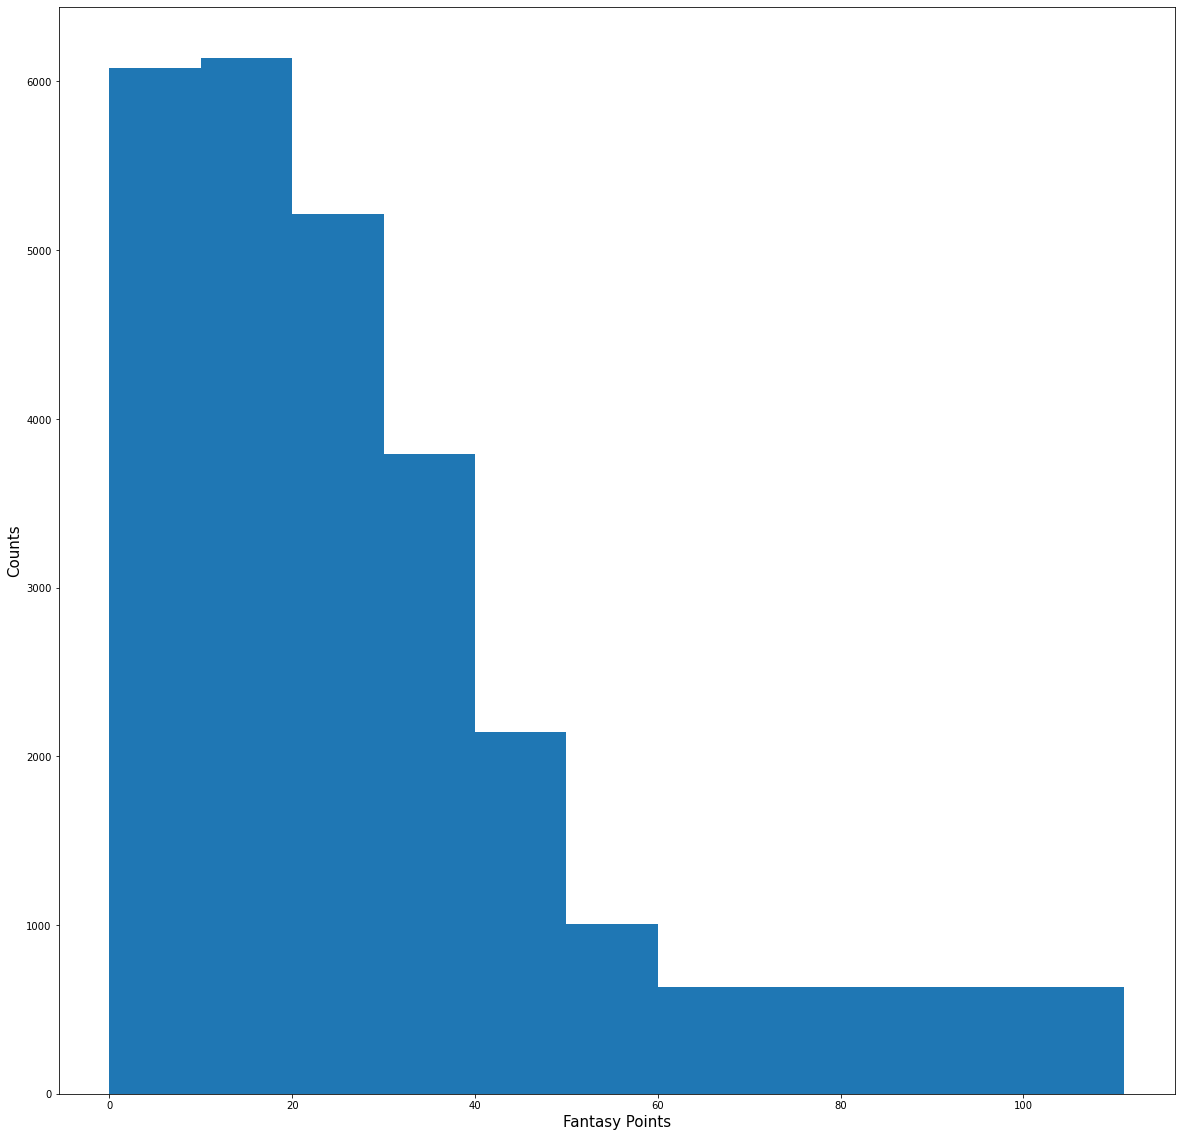

In [68]:
# Let's first visualize the data

fig, ax = plt.subplots(figsize = (20, 20))

plt.xlabel("Fantasy Points", fontsize = 15)
plt.ylabel("Counts", fontsize = 15)

plt.hist(df["Fantasy_Points"], bins = [0, 10, 20, 30, 40, 50, 60, 111])

In [ ]:
'''
It appears that many players score within the 10-20 range in fantasy basketball.

Now, it is time to compare variables with each other.
'''

fig, ax = plt.subplots(figsize = (20, 20))

starter_dataset = df.loc[df["GS"] == 1]

plt.title("Opponent vs Fantasy Points for each starter")
plt.xlabel("Opponent", fontsize = 15)
plt.ylabel("Average Fantasy Points Against", fontsize = 15)

average_points = starter_dataset.groupby("Opp")["Fantasy_Points"].mean().to_frame()

for i, row in average_points.iterrows():
    
    ax.annotate(row["Opp"], (row["Opp"], 

In [71]:
starter_dataset = df.loc[df["GS"] == 1]

starter_dataset

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Fantasy_Points
10,10,Precious Achiuwa,11,2021-11-07,22-049,TOR,H,BRK,L (-13),0,...,8,0,1,1,0,2,13,10.6,-13.0,29
11,11,Precious Achiuwa,12,2021-11-10,22-052,TOR,A,BOS,L (-16),0,...,9,3,1,3,1,4,3,6.3,-8.0,29
13,13,Precious Achiuwa,14,2021-11-19,22-061,TOR,A,SAC,W (+19),0,...,5,2,0,0,1,1,6,5.6,0.0,14
14,14,Precious Achiuwa,15,2021-11-21,22-063,TOR,A,GSW,L (-15),0,...,8,3,0,0,0,1,12,13.0,4.0,28
21,21,Precious Achiuwa,22,2021-12-18,22-090,TOR,H,GSW,W (+19),0,...,5,0,1,0,2,1,17,11.5,4.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25931,25931,Cody Zeller,23,2021-12-04,29-060,POR,H,BOS,L (-28),0,...,9,1,0,0,1,0,10,9.6,-4.0,19
25932,25932,Cody Zeller,24,2021-12-06,29-062,POR,H,LAC,L (-12),0,...,9,1,0,2,1,2,4,4.5,0.0,18
25933,25933,Cody Zeller,25,2022-01-07,29-094,POR,H,CLE,L (-13),0,...,4,0,1,0,1,3,6,4.5,2.0,13
25934,25934,Cody Zeller,26,2022-01-09,29-096,POR,H,SAC,W (+15),0,...,4,1,0,0,1,2,8,5.9,1.0,12
